In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Networks
## Lecture 05

## Implementation of One hidden layer with multi-class

<img src='../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com"/>

## 1. Import Statements
Import all the libraries.

In [2]:
###-----------------
### Import libraries
###-----------------

import os  # Operating system-related functions and utilities
import numpy as np  # NumPy for numerical computations
import pandas as pd  # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib for data visualization

from sklearn.model_selection import train_test_split  # for train-test splitting
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## 2. Setup Global Parameters

In [3]:
###------------------
### Global Parameters
###------------------
RANDOM_STATE = 42 #24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng = np.random.default_rng(seed=RANDOM_STATE)

NOISE = 0.2
TEST_SIZE  = 0.2 # Size of test data
ALPHA = 0.1
N_SAMPLES = 1280
EPOCHS = 15001

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.jet

plt.rcParams.update(params)

## 3. Load Data Set

<div class="alert alert-block alert-info" style="font-family: Arial; font-size:1.1em;">
This data is generated from SKLearn Moons Dataset.
</div>

In [4]:
X, y  = datasets.make_moons(n_samples=N_SAMPLES,
                            shuffle=True,
                            noise=NOISE,
                            random_state=RANDOM_STATE)

X.shape, y.shape

((1280, 2), (1280,))

In [5]:
X[:5], y[:5]

(array([[ 2.03288001,  0.50597051],
        [ 0.3694316 ,  0.43575408],
        [ 0.33874829, -0.71200428],
        [ 0.07242405, -0.09128292],
        [ 0.2290313 , -0.13017337]]),
 array([1, 1, 1, 1, 1]))

In [6]:
data_df = pd.DataFrame(X, columns = ['A', 'B']) # Put X in a dataframe
data_df['target'] = y
data_df.head()

,A,B,target
0,2.032880,0.505971,1
1,0.369432,0.435754,1
2,0.338748,-0.712004,1
3,0.072424,-0.091283,1
4,0.229031,-0.130173,1


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1280 non-null   float64
 1   B       1280 non-null   float64
 2   target  1280 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 30.1 KB


In [8]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,1280.0,0.501691,0.891592,-1.413730,-0.115871,0.500678,1.098034,2.452417
B,1280.0,0.262321,0.543767,-1.075963,-0.187070,0.281233,0.698662,1.520346
target,1280.0,0.500000,0.500195,0.000000,0.000000,0.500000,1.000000,1.000000


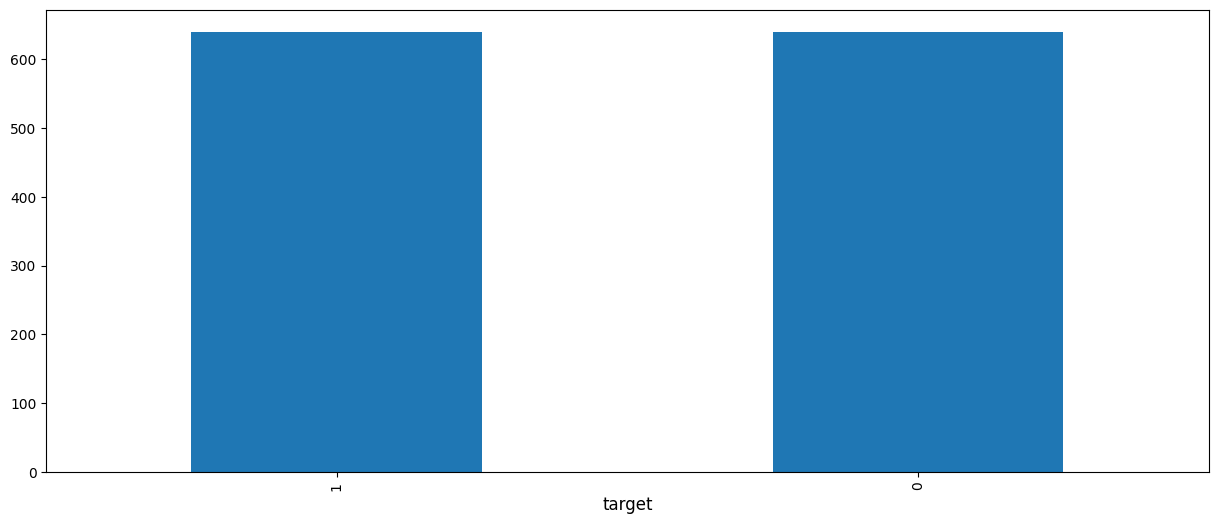

In [9]:
fig, ax = plt.subplots()

data_df['target'].value_counts().plot(ax = ax, kind = 'bar');

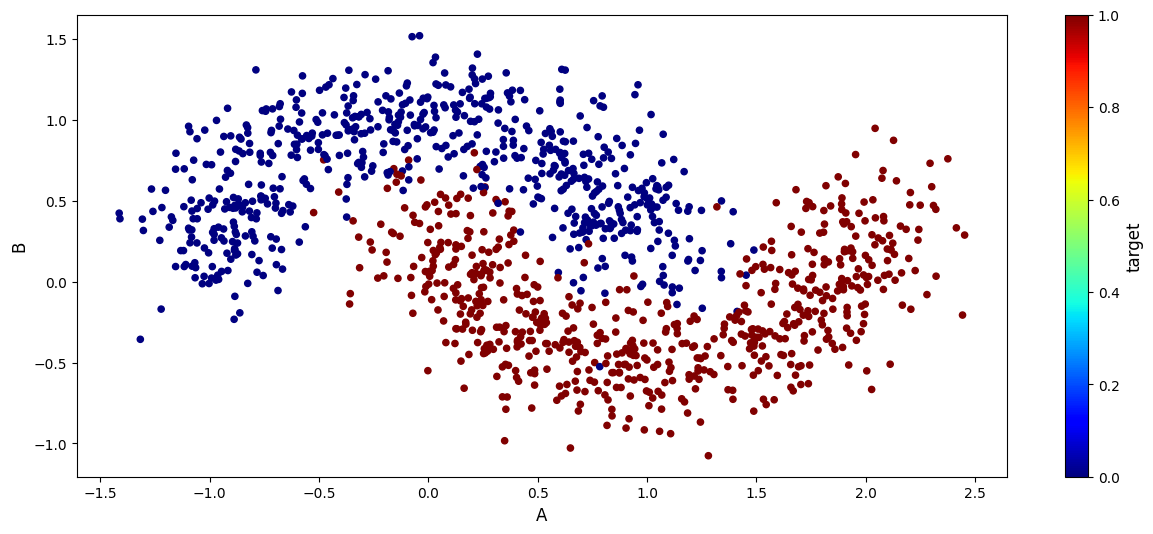

In [10]:
data_df.plot.scatter('A', 'B', s = 20, c = 'target', cmap = plt.cm.jet);

In [11]:
y = pd.get_dummies(y).to_numpy()
y

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=TEST_SIZE,
                                                    stratify=y,
                                                    random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1024, 2), (256, 2), (1024, 2), (256, 2))

### Activations

In [13]:
def fn_softmax(z):
     exp_sc = np.exp(z)
     return exp_sc /np.sum(exp_sc, axis= 1, keepdims=True )

In [14]:
sm = fn_softmax(np.array([[8., 5, 7], [-10, 0., 10]]))
display(sm)

sm.sum(axis = 1)

array([[7.05384513e-01, 3.51190270e-02, 2.59496460e-01],
       [2.06106005e-09, 4.53978686e-05, 9.99954600e-01]])

array([1., 1.])

In [15]:
def fn_activ(z):
    return np.tanh(z)

def fn_activ_prime(a):
    return 1.0 - (np.tanh(a))**2

In [16]:
fn_activ(np.array([[-1., 0., 1.], [-np.inf, 0., np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [17]:
1.0 - (np.tanh(0.5))**2

np.float64(0.7864477329659274)

In [18]:
fn_activ_prime(0.5)

np.float64(0.7864477329659274)

In [19]:
def predict(model, X_p):
    W1,W2,W3,W4,W5 = model['W1'],model['W2'],model['W3'],model['W4'],model['W5']
    b1,b2,b3,b4,b5 = model['b1'],model['b2'],model['b3'],model['b4'],model['b5']

    ### Forward propagation
    # layer 1
    z1 = X_p.dot(W1)  + b1 # Aggregation
    a1 = fn_activ(z1)    # Activation

    # layer 2
    z2 = a1.dot(W2)  + b2 # Aggregation
    a2 = fn_activ(z2)    # Activation

    # layer 3
    z3 = a2.dot(W3)  + b3 # Aggregation
    a3 = fn_activ(z3)    # Activation

    # layer 4
    z4 = a3.dot(W4)  + b4 # Aggregation
    a4 = fn_activ(z4)    # Activation

    # layer 5
    z5 = a4.dot(W5) + b5 # Aggregation
    a5  = fn_softmax(z5) # Activation

    return np.argmax(a5, axis = 1)

In [20]:
def calculate_loss(model, X_l, y_l):
    W1,W2,W3,W4,W5 = model['W1'],model['W2'],model['W3'],model['W4'],model['W5']
    b1, b2, b3, b4, b5 = model['b1'],model['b2'],model['b3'],model['b4'],model['b5']
    m = X_l.shape[0]

    ### Forward propagation
    # layer 1
    z1 = X_l.dot(W1)  + b1 # Aggregation
    a1 = fn_activ(z1)    # Activation

    # layer 2
    z2 = a1.dot(W2)  + b2 # Aggregation
    a2 = fn_activ(z2)    # Activation

    # layer 3
    z3 = a2.dot(W3)  + b3 # Aggregation
    a3 = fn_activ(z3)    # Activation

    # layer 4
    z4 = a3.dot(W4)  + b4 # Aggregation
    a4 = fn_activ(z4)    # Activation

    # layer 5
    z5 = a4.dot(W5) + b5 # Aggregation
    a5  = fn_softmax(z5) # Activation
    loss = - (y_l * np.log( a5 )+ (1-y_l) * np.log( 1- a5)).sum() / m

    return loss

In [21]:
loss_hist = {}

In [22]:
# y_train = y_train.reshape(-1,1)
# y_train.shape

layer_params = {}
layer_params['nn_hdim'] = [ X_train.shape[1], 5,5,4,3] # note output is missing

In [23]:
def build_model(param, X, y, epochs = EPOCHS, alpha= ALPHA):

    m = X.shape[0]
    nn_output_dim = y.shape[1]

    ### Update Here
    W1 = rng.random((param['nn_hdim'][0], param['nn_hdim'][1])
                    , dtype=np.float32) / np.sqrt(param['nn_hdim'][0])
    b1 = np.zeros((1, param['nn_hdim'][1]), dtype=np.float32)

    W2 = rng.random((param['nn_hdim'][1], param['nn_hdim'][2])
                    , dtype=np.float32) / np.sqrt(param['nn_hdim'][1])
    b2 = np.zeros((1, param['nn_hdim'][2]), dtype=np.float32)

    W3 = rng.random((param['nn_hdim'][2], param['nn_hdim'][3])
                    , dtype=np.float32) / np.sqrt(param['nn_hdim'][2])
    b3 = np.zeros((1, param['nn_hdim'][3]), dtype=np.float32)

    W4 = rng.random((param['nn_hdim'][3], param['nn_hdim'][4])
                    , dtype=np.float32) / np.sqrt(param['nn_hdim'][3])
    b4 = np.zeros((1, param['nn_hdim'][4]), dtype=np.float32)

    W5 = rng.random((param['nn_hdim'][4], nn_output_dim)
                    , dtype=np.float32) / np.sqrt(param['nn_hdim'][4])
    b5 = np.zeros((1, nn_output_dim), dtype=np.float32)

    curr_loss, loss, epoch = [], [], []

    for i in range(0, epochs):

        ### Forward propagation
        # layer 1
        z1 = X.dot(W1)  + b1 # Aggregation
        a1 = fn_activ(z1)    # Activation

        # layer 2
        z2 = a1.dot(W2) + b2 # Aggregation
        a2  = fn_activ(z2) # Activation

        # layer 3
        z3 = a2.dot(W3) + b3 # Aggregation
        a3  = fn_activ(z3) # Activation

        # layer 4
        z4 = a3.dot(W4) + b4 # Aggregation
        a4  = fn_activ(z4) # Activation

        # layer 5
        z5 = a4.dot(W5) + b5 # Aggregation
        a5  = fn_softmax(z5) # Activation

        ### Back Propagation
        # ERROR: the shape if a2 and y do not match. Shape of a2 is
        ###--------
        ### Layer 5
        ###--------

        assert ( a5.shape == y.shape), f'a5 shape: {a5.shape}, y shape:{y.shape}'
        dz5 = a5-y

        dW5 = (a4.T).dot(dz5)
        assert ( dW5.shape == W5.shape), f'dW5 shape: {dW5.shape}, W5 shape:{W5.shape}'

        db5 = np.sum(dz5, axis = 0, keepdims=True)
        assert ( db5.shape == b5.shape), f'db5 shape: {db5.shape}, b5 shape:{b5.shape}'

        da4 = dz5.dot(W5.T)
        assert ( da4.shape == a4.shape), f'da4 shape: {da4.shape}, a4 shape:{a4.shape}'


        ###--------
        ### Layer 4
        ###--------
        dz4 = da4 * fn_activ_prime(z4)
        assert ( dz4.shape == z4.shape), f'dz4 shape: {dz4.shape}, z4 shape:{z4.shape}'

        dW4 = (a3.T).dot(dz4)
        assert ( dW4.shape == W4.shape), f'dW4 shape: {dW4.shape}, W4 shape:{W4.shape}'

        db4 = np.sum(dz4, axis = 0, keepdims=True)
        assert ( db4.shape == b4.shape), f'db4 shape: {db4.shape}, b4 shape:{b4.shape}'

        da3 = dz4.dot(W4.T)
        assert ( da3.shape == a3.shape), f'da4 shape: {da3.shape}, a4 shape:{a3.shape}'


        ###--------
        ### Layer 3
        ###--------
        dz3 = da3 * fn_activ_prime(z3)
        assert ( dz3.shape == z3.shape), f'dz3 shape: {dz3.shape}, z3 shape:{z3.shape}'

        dW3 = (a2.T).dot(dz3)
        assert ( dW3.shape == W3.shape), f'dW3 shape: {dW3.shape}, W3 shape:{W3.shape}'

        db3 = np.sum(dz3, axis = 0, keepdims=True)
        assert ( db3.shape == b3.shape), f'db3 shape: {db3.shape}, b3 shape:{b3.shape}'

        da2 = dz3.dot(W3.T)
        assert ( da2.shape == a2.shape), f'da2 shape: {da2.shape}, a2 shape:{a2.shape}'


        ###--------
        ### Layer 2
        ###--------
        dz2 = da2 * fn_activ_prime(z2)
        assert ( dz2.shape == z2.shape), f'dz2 shape: {dz2.shape}, y shape:{z2.shape}'

        dW2 = (a1.T).dot(dz2)
        assert ( dW2.shape == W2.shape), f'dW2 shape: {dW2.shape}, W2 shape:{W2.shape}'

        db2 = np.sum(dz2, axis = 0, keepdims=True)
        assert ( db2.shape == b2.shape), f'db2 shape: {db2.shape}, b2 shape:{b2.shape}'

        da1 = dz2.dot(W2.T)
        assert ( da1.shape == a1.shape), f'da1 shape: {da1.shape}, a1 shape:{a1.shape}'


        ###--------
        ### Layer 1
        ###--------
        dz1 = da1 * fn_activ_prime(z1)
        assert ( dz1.shape == z1.shape), f'dz1 shape: {dz1.shape}, z1 shape:{z1.shape}'

        dW1 = (X.T).dot(dz1)
        assert ( dW1.shape == W1.shape), f'dW1 shape: {dW1.shape}, W1 shape:{W1.shape}'

        db1 = np.sum(dz1, axis = 0, keepdims=True)
        assert ( db1.shape == b1.shape), f'db1 shape: {db1.shape}, b1 shape:{b1.shape}'

        # da1 = dz1.dot(W1.T)
        # assert ( da1.shape == a1.shape), f'da1 shape: {da1.shape}, a1 shape:{a1.shape}'

        ###################################$##$$$$$$$$#$$##$$$$$$$$$$$$$$$$$$$$$$

        #######################
        ### Gradient Update ###
        #######################
        W1 += - alpha * dW1 / m
        W2 += - alpha * dW2 / m
        W3 += - alpha * dW3 / m
        W4 += - alpha * dW4 / m
        W5 += - alpha * dW5 / m

        b1 += - alpha * db1 / m
        b2 += - alpha * db2 / m
        b3 += - alpha * db3 / m
        b4 += - alpha * db4 / m
        b5 += - alpha * db5 / m


        model = {'W1': W1,
                 'W2': W2,
                 'W3': W3,
                 'W4': W4,
                 'W5': W5,
                 'b1': b1,
                 'b2': b2,
                 'b3': b3,
                 'b4': b4,
                 'b5': b5,}

        if i%100 == 0:
            curr_loss = calculate_loss(model, X, y)
            loss.append(curr_loss)
            epoch.append(i)

        if i%1000 == 0:
            print(f'INFO: Loss after {i:>5d} is {curr_loss:8.5f}')

    # update loss
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss

    return model        # da1 = dz1.dot(W1.T)
        # assert ( da1.shape == a1.shape), f'da1 shape: {da1.shape}, a1 shape:{a1.shape}'



In [24]:
model = build_model(layer_params, X_train, y_train)
display(model)

INFO: Loss after     0 is  1.38130
INFO: Loss after  1000 is  0.54560
INFO: Loss after  2000 is  0.16571
INFO: Loss after  3000 is  0.16338
INFO: Loss after  4000 is  0.16266
INFO: Loss after  5000 is  0.16215
INFO: Loss after  6000 is  0.16175
INFO: Loss after  7000 is  0.16139
INFO: Loss after  8000 is  0.16105
INFO: Loss after  9000 is  0.16072
INFO: Loss after 10000 is  0.16040
INFO: Loss after 11000 is  0.16008
INFO: Loss after 12000 is  0.15976
INFO: Loss after 13000 is  0.15944
INFO: Loss after 14000 is  0.15911
INFO: Loss after 15000 is  0.15878


{'W1': array([[ 0.5866983 ,  0.62227655,  2.00309931,  0.611376  ,  0.70073627],
        [-0.30635347, -0.311054  ,  0.12761028, -0.31030968, -0.31292269]]),
 'W2': array([[ 0.30658772,  0.46154195,  0.40120615,  0.3385238 ,  0.23872461],
        [ 0.54812087,  0.4023996 ,  0.25074056,  0.53015652,  0.21632493],
        [-1.09957369, -0.84551384, -0.87136282, -0.97631891, -0.41049786],
        [ 0.48414016,  0.33869027,  0.55068613,  0.39699802,  0.21006552],
        [ 0.47397173,  0.33895319,  0.2878258 ,  0.50522304,  0.46984194]]),
 'W3': array([[0.16146419, 0.70885278, 0.70643028, 0.36973615],
        [0.39382621, 0.27899908, 0.54187758, 0.4664499 ],
        [0.26352334, 0.2689826 , 0.69325058, 0.38286069],
        [0.50952069, 0.50257849, 0.52552049, 0.48228463],
        [0.24491916, 0.26936317, 0.18248485, 0.28425577]]),
 'W4': array([[0.27865891, 0.55206446, 0.37624054],
        [0.55544447, 0.55293934, 0.88382831],
        [0.55327517, 0.38709622, 1.06968329],
        [0.431107

In [25]:
loss_df = pd.DataFrame(loss_hist)
loss_df.head()

,epoch,loss
0,0,1.381298
1,100,0.997487
2,200,0.572237
3,300,0.562288
4,400,0.557594


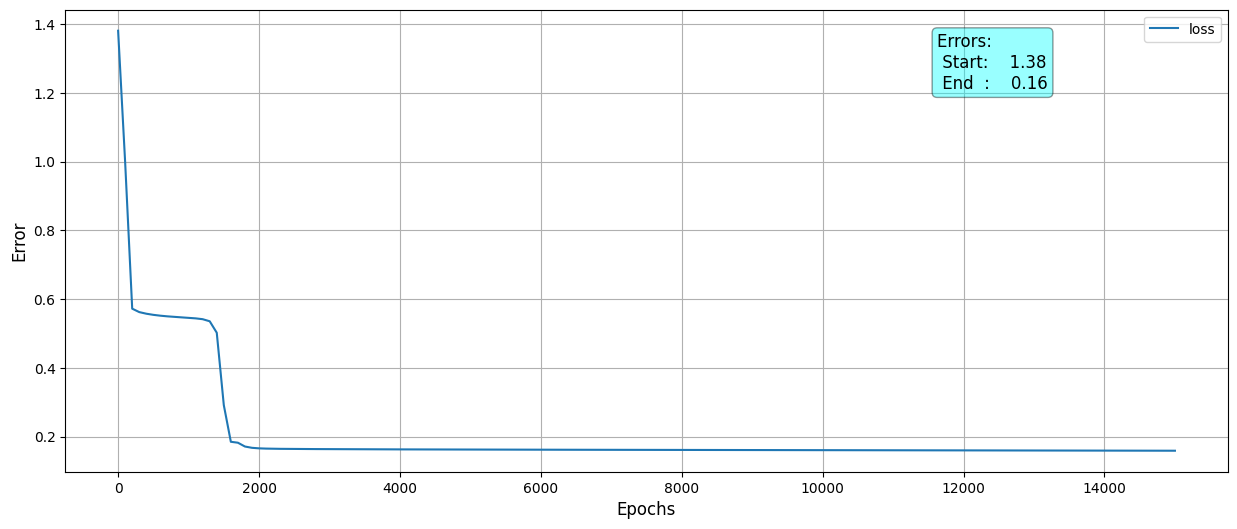

In [26]:
fig, ax = plt.subplots()# initiate figure and axis
loss_df.plot(x = 'epoch', y= 'loss', ax = ax)
txtstr = "Errors: \n Start: {:7.2f}\n End  : {:7.2f}".format(loss_df.iloc[0]['loss'],
                                                             loss_df.iloc[-1]['loss'])

props = dict (boxstyle = 'round', facecolor = 'cyan', alpha = 0.4)

ax.text(0.75, 0.95, txtstr,
        transform=ax.transAxes,
        fontsize = 12,
        verticalalignment = 'top',
        bbox = props)

ax.set_xlabel('Epochs')
ax.set_ylabel('Error')

ax.grid();

### Train Predictions

In [27]:
y_pred = predict(model, X_train)

print(f'Accuracy: {accuracy_score (np.argmax(y_train, axis=1), y_pred):7.4f}')

Accuracy:  0.9697


### Test Predictions

In [28]:
y_pred = predict(model, X_test)

print(f'Accuracy: {accuracy_score (y_test.argmax(axis=1), y_pred):7.4f}')

Accuracy:  0.9531


In [29]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
display(cm)

array([[124,   4],
       [  8, 120]])

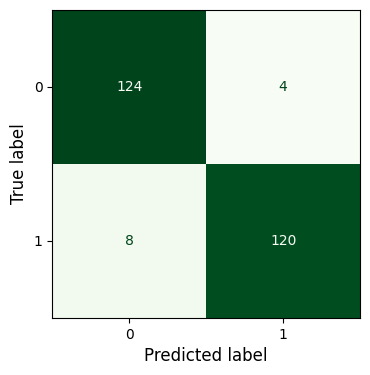

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax =ax, cmap = 'Greens', colorbar=False);

In [31]:
def fn_plot_decision_boundary(pred_func, X_tr, y_tr, X_ts, y_ts):
    '''
        pred_func : function making predictions using Train data,
        X_tr :  Train,
        y_tr : Train labels,
        X_ts : Test,
        y_ts : Test labels

    '''

    fig, ax = plt.subplots(figsize = (15,5))
    dm = 0.05
    x_min, x_max = X_tr[:,0].min() - 0.5, X_tr[:,0].max() + 0.5
    y_min, y_max = X_tr[:,1].min() - 0.5, X_tr[:,1].max() + 0.5

    x1, y1 = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))

    XX = np.c_[x1.ravel(), y1.ravel()]

    Z = pred_func(XX)
    Z = Z.reshape(x1.shape)

    ax.contourf(x1,y1,Z, alpha = 0.6, cmap=plt.cm.coolwarm)
    ax.scatter(X_tr[:,0], X_tr[:,1],
               c = y_tr.argmax(axis=1), s = 15, edgecolor='k', cmap=plt.cm.bwr)
    ax.scatter(X_ts[:,0], X_ts[:,1],
               c = y_ts.argmax(axis=1), s = 50, marker='*', edgecolor='k', cmap=plt.cm.Paired)

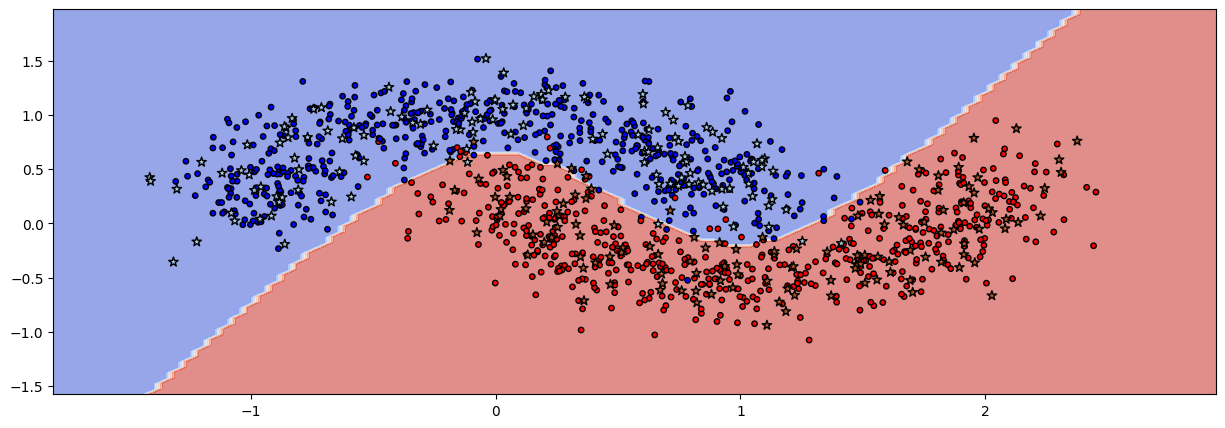

In [32]:
fn_plot_decision_boundary(lambda XX : predict(model, XX),
                          X_train, y_train, X_test, y_test)


In [33]:
y = 0.000001
display(-np.log(y))
-np.log(1-y)

np.float64(13.815510557964274)

np.float64(1.000000500029089e-06)